In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
file_path = r"D:\Predictive Maintenance Analysis for Manufacturing Machines\predictive_maintenance.csv"
df = pd.read_csv(file_path)
print(df)

        UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0    

In [5]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [11]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])

In [15]:
df['Temp_diff'] = df['Process temperature [K]'] - df['Air temperature [K]']

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ['Air temperature [K]', 'Process temperature [K]', 
            'Rotational speed [rpm]', 'Torque [Nm]', 
            'Tool wear [min]', 'Temp_diff']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [31]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


ValueError: could not convert string to float: 'M14860'

<Figure size 800x600 with 0 Axes>

In [33]:
df[num_cols].dtypes


Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]     float64
Torque [Nm]                float64
Tool wear [min]            float64
Temp_diff                  float64
dtype: object

In [43]:
num_cols = ['Air temperature [K]', 'Process temperature [K]', 
            'Rotational speed [rpm]', 'Torque [Nm]', 
            'Tool wear [min]', 'Temp_diff']  # Only numeric columns

# Just to be safe, make sure they are all numeric
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

# Now scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [47]:
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')


<Axes: >

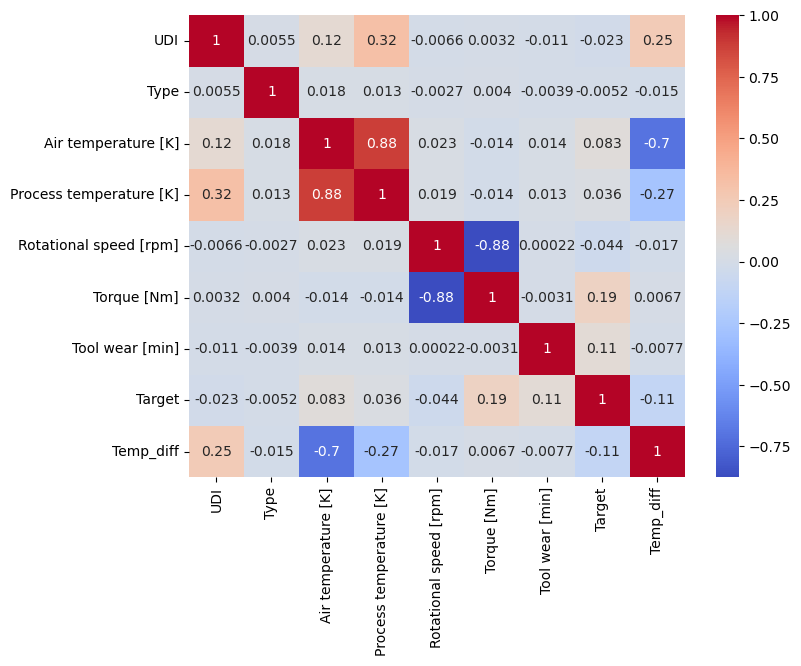

In [51]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')


<Axes: xlabel='Target', ylabel='Torque [Nm]'>

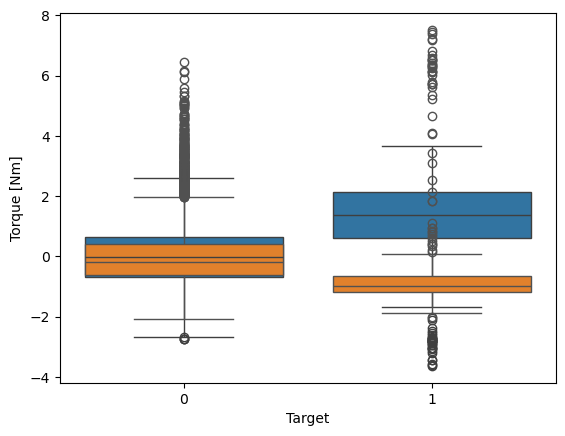

In [53]:
sns.boxplot(x='Target', y='Torque [Nm]', data=df)
sns.boxplot(x='Target', y='Rotational speed [rpm]', data=df)

<Axes: xlabel='Tool wear [min]', ylabel='Count'>

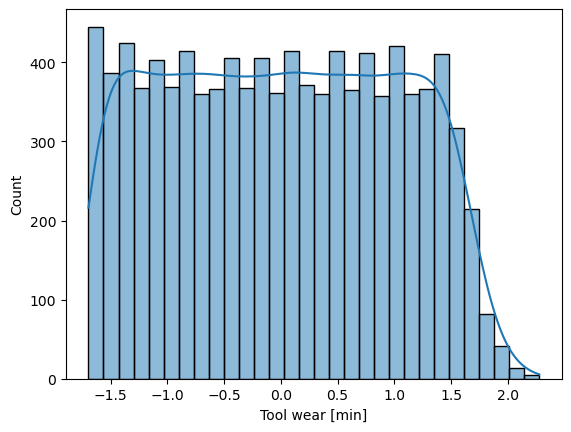

In [55]:
sns.histplot(df['Tool wear [min]'], bins=30, kde=True)